In [7]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns

In [8]:
output_dir = Path("/Users/anthony/CLionProjects/Option_pricer/examples/output")
sequences_2_file = output_dir / "sequences_2.csv"
sequences_50_file = output_dir / "sequences_50.csv"

In [14]:
sequences_2 = pd.read_csv(sequences_2_file, index_col=["Sample", "Dimension"])
sequences_50 = pd.read_csv(sequences_50_file, index_col=["Sample", "Dimension"])

In [24]:
sequences_2

Sobol     Faure   Uniform
Sample Dimension                              
1      1          0.484375  0.328125  0.374540
       2          0.828125  0.984375  0.796543
2      1          0.359375  0.828125  0.950714
       2          0.453125  0.484375  0.183435
3      1          0.859375  0.203125  0.731994
...                    ...       ...       ...
998    2          0.095215  0.689941  0.790014
999    1          0.595215  0.031738  0.950237
       2          0.595215  0.158691  0.690560
1000   1          0.845215  0.531738  0.446006
       2          0.345215  0.658691  0.521301

[2000 rows x 3 columns]

In [25]:
sequences_50

Sobol     Faure   Uniform
Sample Dimension                              
1      1          0.484375  0.792453  0.374540
       2          0.828125  0.792453  0.796543
       3          0.515625  0.792453  0.950714
       4          0.234375  0.792453  0.183435
       5          0.953125  0.792453  0.731994
...                    ...       ...       ...
1000   46         0.885254  0.780349  0.191649
       47         0.126465  0.138839  0.637286
       48         0.550293  0.497330  0.602445
       49         0.458496  0.855821  0.951839
       50         0.357910  0.214311  0.196686

[50000 rows x 3 columns]

In [19]:
def plot_sequences(sequences, s, sample_sizes=[5, 20, 100], s1=1, s2=2):
    """
    Plot sequences for specified dimensions and sample sizes.

    :param sequences: DataFrame with a multi-level index (Sample, Dimension)
    :param sample_sizes: List of sample sizes to plot
    :param s1: Dimension to plot on the x-axis
    :param s2: Dimension to plot on the y-axis
    """
    # Plot configuration
    num_rows = len(sample_sizes)
    num_cols = 3
    sequence_cols = ['Sobol', 'Faure', 'Uniform']
    
    # Create a plot grid based on the number of sample sizes and sequence types
    num_rows = len(sample_sizes)
    num_cols = 3
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.4, wspace=0.3)

    for row, sample_size in enumerate(sample_sizes):
        for col, seq_col in enumerate(sequence_cols):
            
            # Filter the data for the current sample size and dimensions
            filtered_data = sequences.loc[:sample_size].unstack(level='Dimension')
            
            x = filtered_data[(seq_col, s1)]
            y = filtered_data[(seq_col, s2)]
            
            ax = axes[row, col]
            ax.scatter(x, y, alpha=0.7, s=50)
            ax.set_title(f'{plot_titles[col]} (N={sample_size})')
            ax.set_xlabel(f'Dimension {s1}')
            ax.set_ylabel(f'Dimension {s2}')

    fig.suptitle(f'Comparison between Sobol, Faure sequences and Uniform draws for {s} dimensions', fontsize=16)
    plt.show()

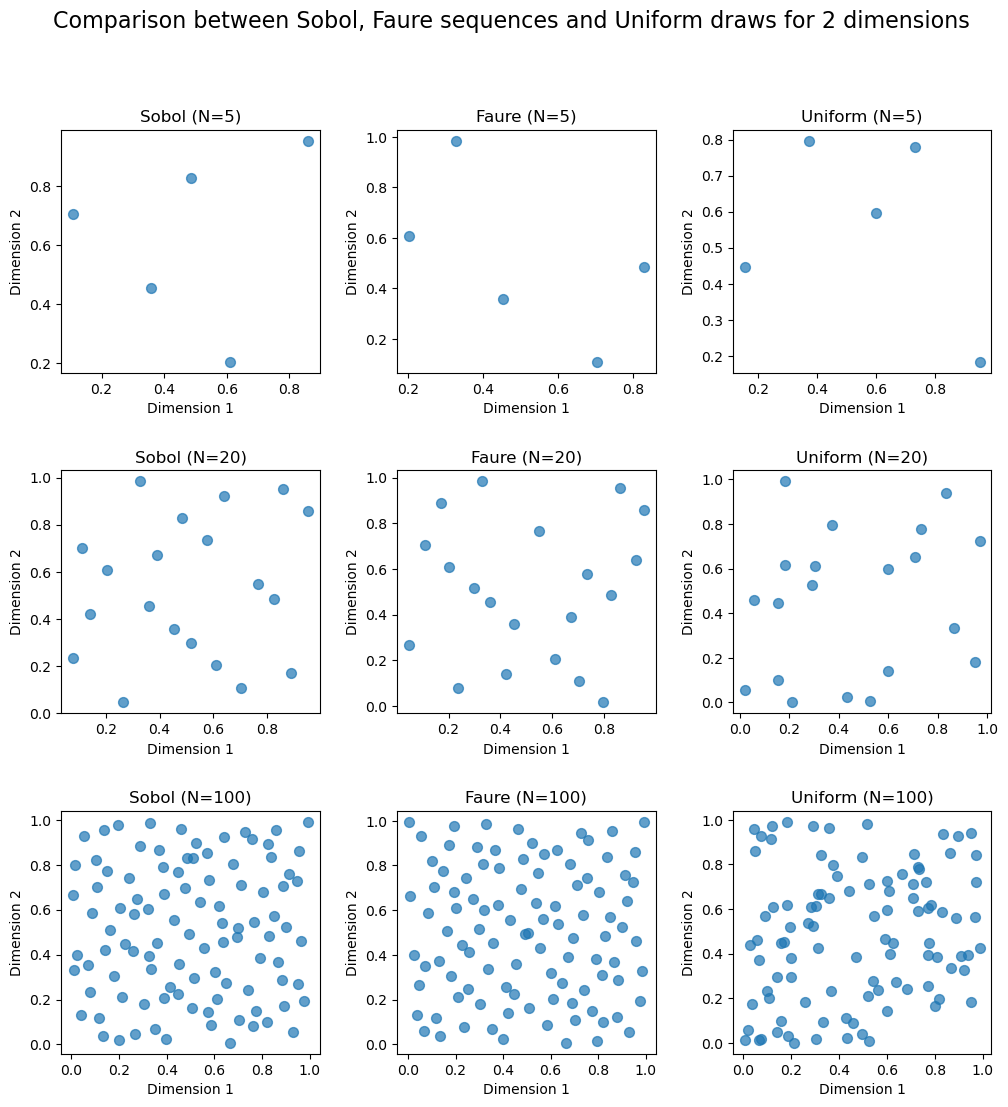

In [20]:
plot_sequences(sequences_2, 2)

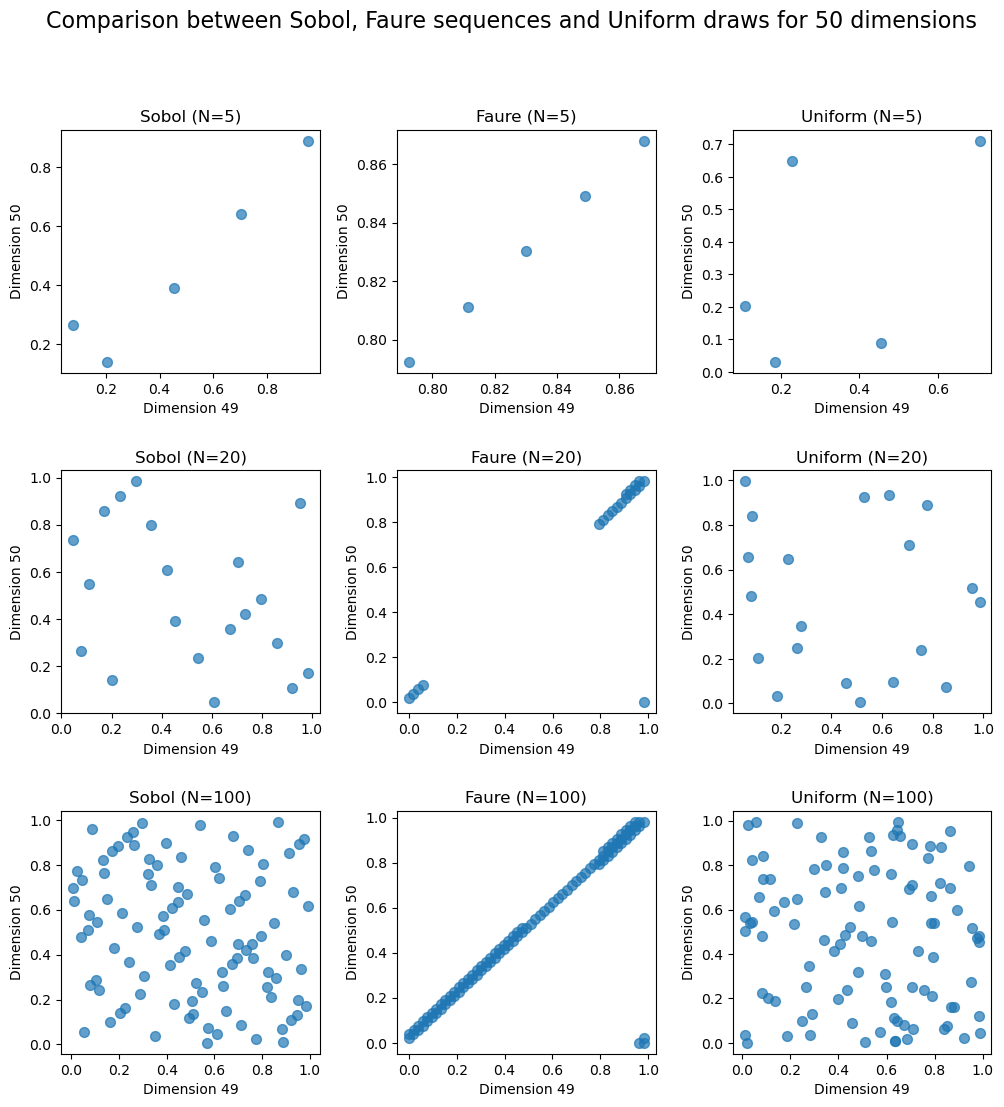

In [23]:
plot_sequences(sequences_50, 50, s1=49, s2=50)